US Stocks

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math

# Import scikit-learn modules
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV 

In [2]:
US_stocks = pd.read_csv(r"C:\Sravan ML\Machine Learning\Linear regression\US Stock Market Dataset.csv")

In [3]:
US_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1012 non-null   int64  
 1   Date               1012 non-null   object 
 2   Natural_Gas_Price  1012 non-null   float64
 3   Natural_Gas_Vol.   1009 non-null   float64
 4   Crude_oil_Price    1012 non-null   float64
 5   Crude_oil_Vol.     990 non-null    float64
 6   Copper_Price       1012 non-null   float64
 7   Copper_Vol.        976 non-null    float64
 8   Bitcoin_Price      1012 non-null   object 
 9   Bitcoin_Vol.       1012 non-null   int64  
 10  Platinum_Price     1012 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1012 non-null   object 
 13  Ethereum_Vol.      1012 non-null   int64  
 14  S&P_500_Price      1012 non-null   object 
 15  Nasdaq_100_Price   1012 non-null   object 
 16  Nasdaq_100_Vol.    1011 

In [4]:
US_stocks.isnull().sum()

Unnamed: 0             0
Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       3
Crude_oil_Price        0
Crude_oil_Vol.        22
Copper_Price           0
Copper_Vol.           36
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        376
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           45
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              1
dtype: int64

In [5]:
# Calculate the mean of numeric columns
numeric_columns = US_stocks.select_dtypes(include=[np.number])
column_means = numeric_columns.mean()

# Fill null values with the respective column means
df_filled = US_stocks.fillna(column_means)

# Check if there are any remaining null values
df=df_filled
print(df.isnull().sum())


Unnamed: 0           0
Date                 0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64


In [6]:
# Remove commas and spaces from all columns
df = df.replace({',': '', ' ': ''}, regex=True)

In [7]:
# List of columns to process
columns_to_process = ['Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price', 'Crude_oil_Vol.',
                      'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price', 'Bitcoin_Vol.',
                      'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price', 'Ethereum_Vol.',
                      'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
                      'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
                      'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
                      'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
                      'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
                      'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.',
                      'Gold_Price', 'Gold_Vol.']

# Convert the columns to float
df[columns_to_process] = df[columns_to_process].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1012 non-null   int64  
 1   Date               1012 non-null   object 
 2   Natural_Gas_Price  1012 non-null   float64
 3   Natural_Gas_Vol.   1012 non-null   float64
 4   Crude_oil_Price    1012 non-null   float64
 5   Crude_oil_Vol.     1012 non-null   float64
 6   Copper_Price       1012 non-null   float64
 7   Copper_Vol.        1012 non-null   float64
 8   Bitcoin_Price      1012 non-null   float64
 9   Bitcoin_Vol.       1012 non-null   float64
 10  Platinum_Price     1012 non-null   float64
 11  Platinum_Vol.      1012 non-null   float64
 12  Ethereum_Price     1012 non-null   float64
 13  Ethereum_Vol.      1012 non-null   float64
 14  S&P_500_Price      1012 non-null   float64
 15  Nasdaq_100_Price   1012 non-null   float64
 16  Nasdaq_100_Vol.    1012 

In [9]:

# Exclude non-numeric columns
numeric_df1 = df.select_dtypes(include=['float64'])

# Compute the correlation matrix
correlation_matrix = numeric_df1.corr()
 
# Extract the correlation values with the target variable (e.g., 'price')
correlation_with_price = correlation_matrix['S&P_500_Price']
 
# Identify variables with positive correlation
positive_correlation = correlation_with_price[correlation_with_price > 0.7]
 
# Display the variables with positive correlation
print("Variables with Positive Correlation:")
print(positive_correlation)

Variables with Positive Correlation:
Copper_Price        0.845766
Bitcoin_Price       0.771364
Ethereum_Price      0.842325
S&P_500_Price       1.000000
Nasdaq_100_Price    0.952909
Apple_Price         0.901476
Tesla_Price         0.830110
Microsoft_Price     0.920449
Google_Price        0.952920
Nvidia_Price        0.752840
Berkshire_Price     0.858423
Name: S&P_500_Price, dtype: float64


In [10]:
x= df[['Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Google_Price', 'Nvidia_Price', 'Berkshire_Price']]
y=df["S&P_500_Price"]
print(x,y)  

      Apple_Price  Tesla_Price  Microsoft_Price  Google_Price  Nvidia_Price  \
0          186.86       188.86           403.78        141.16        630.27   
1          184.40       187.29           397.58        140.10        615.27   
2          188.04       191.59           408.59        151.46        627.74   
3          191.73       190.93           409.72        153.51        624.65   
4          192.42       183.25           403.93        152.18        610.31   
...           ...          ...              ...           ...           ...   
1007        75.80        32.81           160.09         70.25         60.09   
1008        74.60        31.27           157.58         69.76         59.98   
1009        74.95        30.10           159.03         69.89         59.27   
1010        74.36        29.53           158.62         68.08         59.02   
1011        75.09        28.68           160.62         68.43         59.98   

      Berkshire_Price  
0            581600.0  
1  

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=21)
x_train=np.array(x_train)#.reshape(-1, 1)
x_test=np.array(x_test)#.reshape(-1, 1)
y_train=np.array(x_train)#.reshape(-1, 1)
y_test=np.array(x_test)#.reshape(-1, 1)

Text(0, 0.5, 'S&P_500_Price')

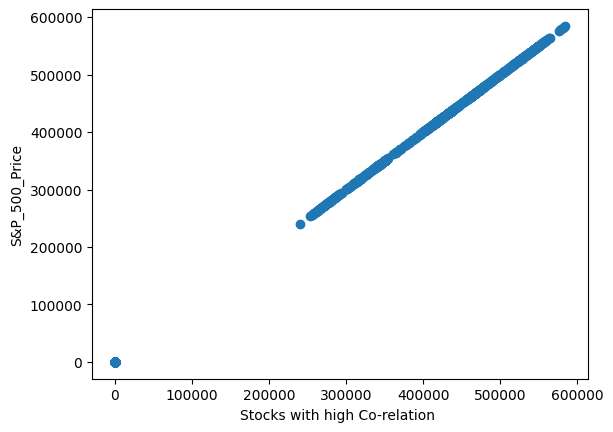

In [12]:
plt.scatter(x_train,y_train)
plt.xlabel("Stocks with high Co-relation ")
plt.ylabel("S&P_500_Price")

In [13]:
lr=LinearRegression()  

In [14]:
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
c=lr.intercept_
print (c)


[ 1.06012976e-11  1.61719527e-11  2.51816346e-11  1.26050281e-11
  4.25472990e-11 -2.91038305e-10]


In [16]:
m=lr.coef_
m

array([[ 1.00000000e+00, -1.41767095e-15,  3.94403513e-15,
         2.69500102e-15, -1.35736092e-15, -2.66647381e-17],
       [ 2.38771891e-13,  1.00000000e+00, -7.51727239e-14,
         1.03780211e-13,  2.59833387e-14, -1.11022302e-16],
       [ 7.63929499e-16, -2.59883261e-16,  1.00000000e+00,
         7.28654481e-16, -3.26039499e-16, -5.99563801e-17],
       [-4.87996339e-16,  1.17082993e-15, -1.46313242e-15,
         1.00000000e+00,  6.79495548e-16, -2.85687272e-17],
       [-7.09696866e-16,  6.39245601e-16, -1.99053547e-15,
         3.10264357e-16,  1.00000000e+00, -9.93129190e-17],
       [ 1.44627615e-12,  1.53543844e-13, -1.20666281e-13,
        -3.72378072e-13,  2.41228478e-14,  1.00000000e+00]])

In [17]:
y_pred=lr.predict(x_train)
y_pred.flatten()

array([1.74070e+02, 3.37970e+02, 3.04100e+02, ..., 6.90800e+01,
       7.11300e+01, 3.26125e+05])

Text(0, 0.5, 'S&P_500_Price')

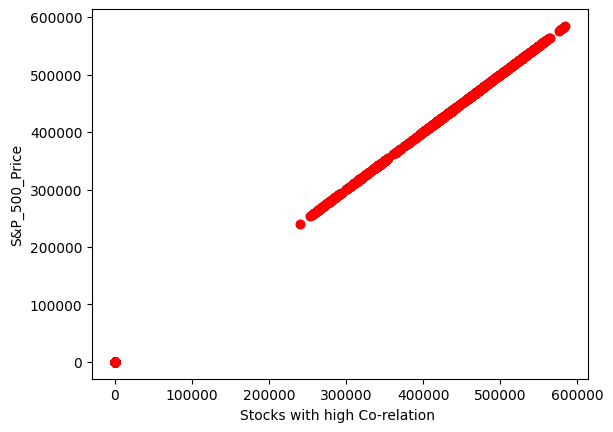

In [18]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_pred,color="red")
plt.xlabel("Stocks with high Co-relation ")
plt.ylabel("S&P_500_Price")

In [19]:
y_pred1=lr.predict(x_test)
y_pred1.flatten()

array([1.5765e+02, 1.8919e+02, 2.7523e+02, ..., 1.2181e+02, 1.8427e+02,
       4.1778e+05])

Text(0, 0.5, 'S&P_500_Price')

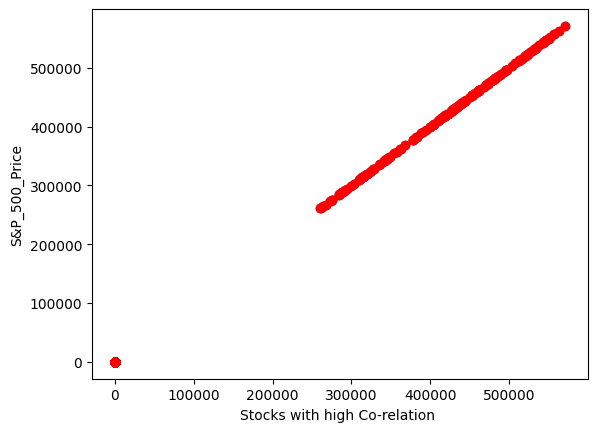

In [20]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred1,color="red")
plt.xlabel("Stocks with high Co-relation ")
plt.ylabel("S&P_500_Price")

In [21]:
# MSE
mse = mean_squared_error(y_test, y_pred1)
# RMSE
rmse = math.sqrt(mse)
# MAE
mae = mean_absolute_error(y_test, y_pred1)
# R2
r2 = r2_score(y_test, y_pred1)
# print them all
print("MSE --> ", mse)
print("RMSE --> ", rmse)
print("MAE --> ", mae)
print("R2 --> ", r2)     

MSE -->  9.863699584155078e-22
RMSE -->  3.1406527321808565e-11
MAE -->  1.1224346757644556e-11
R2 -->  1.0


In [22]:

# Define a range of alpha values to search
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best alpha value found by grid search
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Initialize Ridge regression with the best alpha value
ridge_tuned = Ridge(alpha=best_alpha)
ridge_tuned.fit(x_train, y_train)

# Evaluate the tuned model
training_score_tuned = ridge_tuned.score(x_train, y_train)
testing_score_tuned = ridge_tuned.score(x_test, y_test)

print("Tuned Training Data Score:", training_score_tuned)
print("Tuned Testing Data Score:", testing_score_tuned)

Best Alpha: 0.1
Tuned Training Data Score: 0.9999999999998548
Tuned Testing Data Score: 0.9999999999998703


In [23]:
# Coefficients and intercept
M = ridge_tuned.coef_
c = ridge_tuned.intercept_

# Predictions on training and testing data
y_train_pred = ridge_tuned.predict(x_train)
y_test_pred = ridge_tuned.predict(x_test)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("Coefficients (M):", M)
print("Intercept (c):", c)
print("Training Data Metrics:")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared Score:", r2_train)
print("Root Mean Squared Error:", rmse_train)
print("\nTesting Data Metrics:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared Score:", r2_test)
print("Root Mean Squared Error:", rmse_test)  

Coefficients (M): [[ 9.99997589e-01  3.51579986e-07  1.13378003e-06 -1.46731832e-06
  -5.82204077e-08  4.15732248e-10]
 [ 3.51579989e-07  9.99999883e-01 -9.19284840e-08  3.43525447e-07
  -2.37272911e-08 -5.26852000e-11]
 [ 1.13378004e-06 -9.19284811e-08  9.99998362e-01  1.67483998e-06
   2.94310497e-07 -1.56396954e-10]
 [-1.46731833e-06  3.43525442e-07  1.67483997e-06  9.99997090e-01
  -2.01439392e-07  2.77221563e-10]
 [-5.82204305e-08 -2.37272890e-08  2.94310517e-07 -2.01439415e-07
   9.99999906e-01  2.88504622e-11]
 [ 4.08584377e-10 -5.12432469e-11 -1.58725029e-10  2.75872767e-10
   3.01373825e-11  1.00000000e+00]]
Intercept (c): [-3.77466748e-05 -1.05851485e-05  1.13654708e-04 -6.63305186e-05
 -3.46849779e-05  2.06637196e-08]
Training Data Metrics:
Mean Squared Error: 1.4772628903121478e-10
Mean Absolute Error: 7.53110723574938e-06
R-squared Score: 0.9999999999998548
Root Mean Squared Error: 1.2154270403081165e-05

Testing Data Metrics:
Mean Squared Error: 1.237557018677193e-10
Mean

In [24]:
# Define a wider range of alpha values to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best alpha value found by grid search
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Initialize Ridge regression with the best alpha value
ridge_tuned = Ridge(alpha=best_alpha)
ridge_tuned.fit(x_train, y_train)

# Evaluate the tuned model
training_score_tuned = ridge_tuned.score(x_train, y_train)
testing_score_tuned = ridge_tuned.score(x_test, y_test)

print("Tuned Training Data Score:", training_score_tuned)
print("Tuned Testing Data Score:", testing_score_tuned)   


Best Alpha: 0.001
Tuned Training Data Score: 1.0
Tuned Testing Data Score: 1.0


In [25]:
# Define a range of alpha values to search
param_grid = {'alpha': [0.001, 0.1, 1.0, 10.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best alpha value found by grid search
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Initialize Ridge regression with the best alpha value
ridge_tuned = Ridge(alpha=best_alpha)
ridge_tuned.fit(x_train, y_train)

# Evaluate the tuned model
training_score_tuned = ridge_tuned.score(x_train, y_train)
testing_score_tuned = ridge_tuned.score(x_test, y_test)

print("Tuned Training Data Score:", training_score_tuned)
print("Tuned Testing Data Score:", testing_score_tuned)

Best Alpha: 0.001
Tuned Training Data Score: 1.0
Tuned Testing Data Score: 1.0


In [26]:
# Coefficients and intercept
M = ridge_tuned.coef_
c = ridge_tuned.intercept_

# Predictions on training and testing data
y_train_pred = ridge_tuned.predict(x_train)
y_test_pred = ridge_tuned.predict(x_test)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("Coefficients (M):", M)
print("Intercept (c):", c)
print("\nTraining Data Metrics:")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared Score:", r2_train)
print("Root Mean Squared Error:", rmse_train)
print("\nTesting Data Metrics:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared Score:", r2_test)
print("Root Mean Squared Error:", rmse_test)


Coefficients (M): [[ 9.99999976e-01  3.51581581e-09  1.13378751e-08 -1.46732878e-08
  -5.82212145e-10  4.15733953e-12]
 [ 3.51581789e-09  9.99999999e-01 -9.19302916e-10  3.43527990e-09
  -2.37270360e-10 -5.26855113e-13]
 [ 1.13378746e-08 -9.19296460e-10  9.99999984e-01  1.67484985e-08
   2.94311467e-09 -1.56398163e-12]
 [-1.46732835e-08  3.43527180e-09  1.67484940e-08  9.99999971e-01
  -2.01440573e-09  2.77223296e-12]
 [-5.82231941e-10 -2.37267713e-10  2.94312107e-09 -2.01442060e-09
   9.99999999e-01  2.88509686e-13]
 [ 2.88896207e-12 -8.10824453e-14  2.08305703e-14 -5.39341460e-13
   3.01373994e-13  1.00000000e+00]]
Intercept (c): [-3.77470059e-07 -1.05850575e-07  1.13655079e-06 -6.63309606e-07
 -3.46850243e-07  2.32830644e-10]

Training Data Metrics:
Mean Squared Error: 1.477275793769356e-14
Mean Absolute Error: 7.531289120412276e-08
R-squared Score: 1.0
Root Mean Squared Error: 1.2154323484955286e-07

Testing Data Metrics:
Mean Squared Error: 1.2375674957749142e-14
Mean Absolute Err